# Vylepsenia

Takze! Framework nam stoji a funguje. Teraz by sme sa s nim mohli trochu pohrat.


In [8]:
import numpy as np

from utils import dataset_Circles, dataset_Flower, draw_DecisionBoundary, draw_TrainingResults
from layer import Input, Dense
from loss import CreateLossFunction
from optimizer import GradientDescent
from model import Model


## 1. Underfit & Overfit

Kazdy machine learning problem je iny, a tazko dopredu odhadnut, aka kombinacia architektury siete a hyperparametrov bude fungovat najlepsie. Riesenie ML problemu je iterativny proces, pri ktorom sa skusaju rozne napady/moznosti/kombinacie.

Underfit a Overfit su situacie, ktore sa velmi casto vyskytuju a je dobre im rozumiet a vediet ich identifikovat.


In [46]:
def test_UnderfitOverfit(mTrain, mDev, noise, layers, epochs=50000):
    np.random.seed(1)

    # Spravime dataset
    X, Y = dataset_Circles(m=mTrain, noise=noise)
    devX, devY = dataset_Circles(m=mDev, noise=noise)

    # Spravime model
    model = Model(layers)
    model.initialize(loss=CreateLossFunction('bce'), optimizer=GradientDescent(0.1))

    # Ucime
    results = model.train(X, Y, epochs, 0, devX, devY, verboseInterval=5000)

    # Kreslime vysledok
    draw_TrainingResults(results)
    draw_DecisionBoundary(devX, devY, model)



### Underfit

Je situacia, pri ktorej siet nema dostatocnu kapacitu na to, aby sa dokazala "naucit" riesit problem. Je pre nu typicke, ze ma nizku (nie optimalnu) uspesnost uz pri trenovani.

Epoch 0:  Loss = 0.6123505   Val_Loss = 0.6646747
Epoch 5000:  Loss = 0.1423078   Val_Loss = 0.1799733
Epoch 10000:  Loss = 0.1093094   Val_Loss = 0.1369586
Epoch 15000:  Loss = 0.0965078   Val_Loss = 0.1214535
Epoch 20000:  Loss = 0.0878562   Val_Loss = 0.1071609
Epoch 25000:  Loss = 0.0826771   Val_Loss = 0.1013937
Epoch 30000:  Loss = 0.0790742   Val_Loss = 0.0977522
Epoch 35000:  Loss = 0.0763897   Val_Loss = 0.0952529
Epoch 40000:  Loss = 0.0743064   Val_Loss = 0.0933674
Epoch 45000:  Loss = 0.0726411   Val_Loss = 0.0919194
Training complete.
Epoch 49999:  Loss = 0.0712791   Val_Loss = 0.0907807


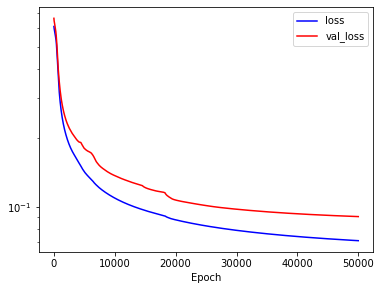

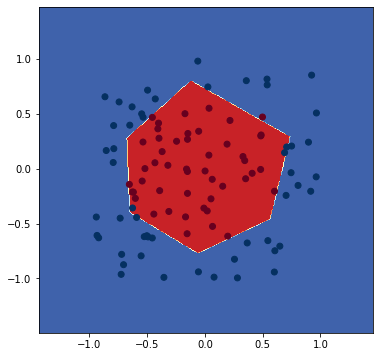

In [47]:
def test_Underfit():

    layers = [
        Input(2),
        Dense(3, act='relu'),
        Dense(1, act='sigmoid')
    ]

    # Train underfit scenario
    test_UnderfitOverfit(mTrain=500, mDev=100, noise=0.0, layers=layers)


test_Underfit()